### **Multiple Linear Regression**

Multiple Linear Regression attempts to model the relationship between two or more features and a response by fitting a linear equation to observed data. The steps to perform multiple linear Regression are almost similar to that of simple linear Regression. The Difference Lies in the evaluation. We can use it to find out which factor has the highest impact on the predicted output and now different variables relate to each other.

**Formula for Multiple Linear Regression**

> ```
>Y = m1x1 + m2x2 + m3x3 + ___ + mkxk + b
>
>Here m1, m2, m3 ___ are slops of respective variables,
     x1, x2, x3 ___ are independent variables
     Y is dependent variable whose value is dependent of that x's
```
*Here Simple Difference between Linear Regression and multiple linear regression is that when we have One independent and one dependent variable then we can use single variable Linear Regression while when we have multiple independent variable and one dependent variable whose value is dependent on that multiple independent variable then at that time we can use Multi variable Linear Regression Model*

## Implementing Multiple Linear Regression by applying on Combined Cycle Power Plant Data Set


### Attribute Information:

Features consist of hourly average ambient variables
- Temperature (T) in the range 1.81°C and 37.11°C,
- Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
- Relative Humidity (RH) in the range 25.56% to 100.16%
- Exhaust Vacuum (V) in teh range 25.36-81.56 cm Hg
- Net hourly electrical energy output (EP) 420.26-495.76 MW
The averages are taken from various sensors located around the plant that record the ambient variables every second. The variables are given without normalization.

### Import Libraries

In [ ]:
import pandas as pd
import numpy as np

**Q1 . Why you want to apply regression on selected dataset? Discuss full story behind dataset.**
The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant.
A combined cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum is colected from and has effect on the Steam Turbine, he other three of the ambient variables effect the GT performance.

### Import Dataset

In [ ]:
data_df = pd.read_excel('Dataset.xlsx')

In [ ]:
data_df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


Q2. How many total observations in data?

rows = 9568
cols = 4

Q3. How many independent variables && Which is dependent variable?

Here is 4 independant variable and one dependent variable that we want to predict.

### Define X and Y

In [ ]:
X = data_df.drop(['PE'], axis = 1).values
Y = data_df['PE'].values

In [ ]:
print(X)

[[  14.96   41.76 1024.07   73.17]
 [  25.18   62.96 1020.04   59.08]
 [   5.11   39.4  1012.16   92.14]
 ...
 [  31.32   74.33 1012.92   36.48]
 [  24.48   69.45 1013.86   62.39]
 [  21.6    62.52 1017.23   67.87]]


In [ ]:
print(Y)

[463.26 444.37 488.56 ... 429.57 435.74 453.28]


In [ ]:
data_df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


### split the datasets into training set and test set

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

### Train the model on training set

In [ ]:
from sklearn.linear_model import LinearRegression
ml = LinearRegression()
ml.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Predict the test data on results

In [ ]:
y_pred = ml.predict(x_test)
print(y_pred)

[431.40245096 458.61474119 462.81967423 ... 432.47380825 436.16417243
 439.00714594]


In [ ]:
ml.predict([[14.96, 41.76, 1024.7, 73.17]])

array([467.39104744])

### Evalute the model

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test, y_pred)

0.9304112159477683

In [ ]:
# Here we are calculating RMSE - Root mean square error, R2 Score for our trainning score as well as for testing set

# model evaluation for training set

from sklearn.metrics import mean_squared_error, r2_score

y_train_predict = ml.predict(x_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set

y_test_predict = ml.predict(x_test)
# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))

# r-squared score of the model
r2 = r2_score(y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 4.576195321087113
R2 score is 0.9279441090358654


The model performance for testing set
--------------------------------------
RMSE is 4.513134498647909
R2 score is 0.9304112159477683


### plot  the results

In [ ]:
import matplotlib.pyplot as plt

Text(0.5,1,'Actual Vs Predicated')

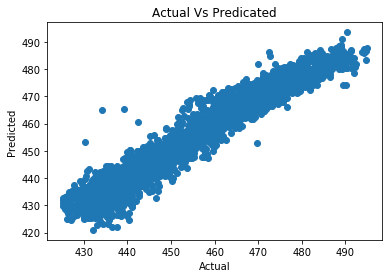

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual Vs Predicated')

### predicated Values

In [ ]:
pred_y_df = pd.DataFrame({'Actual Value':y_test, 'Predicated_value':y_pred, 'Diffrence': y_test-y_pred})
pred_y_df[0:20]

,Actual Value,Predicated_value,Diffrence
0,431.23,431.402451,-0.172451
1,460.01,458.614741,1.395259
2,461.14,462.819674,-1.679674
3,445.90,448.601237,-2.701237
4,451.29,457.879479,-6.589479
5,432.68,429.676856,3.003144
6,477.50,473.017115,4.482885
7,459.68,456.532373,3.147627
8,477.50,474.342524,3.157476
9,444.99,446.364396,-1.374396
